<a href="https://colab.research.google.com/github/ranya1958/lotterhoslab-summer25/blob/main/2wayBoxplot_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Comparison of finalTissue_condition and finalTissue_gonadIndex
#   across field sites (Lewisetta and York River) and across populations

In [2]:
# Oyster data visualization and analysis
# Sheet : https://docs.google.com/spreadsheets/d/1VBTC-4FEIpZMImQep1QYbP0dHl7YTDSPuJE9VNtUp-E/edit?gid=1148335677#gid=1148335677

# To put the data together, merge the following tables:
#   - Merge finalTissue table with the bags Table by the column bags_key
#   - Merge that product with the spawn_trt2 Table by the column SpawnTrt_Key - this will give you the “Tank_naming” - the population oysters came from
# Goal: one data frame with finalTissue_condition & finalTissue_gonadIndex & Bag_site & Bags_label & Tank_naming (population)

# Final table: Comparison of finalTissue_condition and finalTissue_gonadIndex vary across field sites (Lewisetta and York River) and across populations
# 2 way boxplot
# Columns to visualize / analyze:
# finalTissue_condition ~ Site * Population (and interaction)
# finalTissue_gonadIndex ~  Site * Population (and interaction)


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# finalTissue table
ft_path = "/content/drive/MyDrive/LotterhosLab/MVP23-FieldBags_finalTissue.csv"
ft_df = pd.read_csv(ft_path)
ft_df

,finalTissue_key,bags_key,finalTissue_timestamp_biopsy,finalTissue_VialLabel,finalTissue_tissueType,finalTissue_VialBuffer,finalTissue_notes,finalTissue_Box_key,useremail,finalTissue_photo1,...,finalTissue_condition,finalTissue_gonadIndex,finalTissue_length,finalTissue_width,peaCrab,bagID,randNum,seqPlateKey,seqPlateWell,quantQubit_ng_ul
0,72ec4d9e,957bbb17,5/21/2025 13:27:28,CviMVPf_250073,gill,95_pure_EtOH,NaN,Box_80_250_01,eaton.a@husky.neu.edu,finalTissue_Images/72ec4d9e.finalTissue_photo1...,...,"3 - Tissue fills cavity, totally opaque, no or...",3 - Follicles clearly defined and gonad appear...,39,29,False,MVP-NH-2,0.677423,0060F976,A1,NaN
1,4b572f5c,bbec9cf8,5/21/2025 11:21:24,CviMVPf_250041,gill,95_pure_EtOH,NaN,Box_80_250_01,eaton.a@husky.neu.edu,finalTissue_Images/4b572f5c.finalTissue_photo1...,...,"3 - Tissue fills cavity, totally opaque, no or...",3 - Follicles clearly defined and gonad appear...,82,63,False,MVP-LA-3,0.684930,0060F976,A2,NaN
2,b2a746f2,957bbb17,5/21/2025 13:13:51,CviMVPf_250067,gill,95_pure_EtOH,NaN,Box_80_250_01,eaton.a@husky.neu.edu,finalTissue_Images/b2a746f2.finalTissue_photo1...,...,"4 - Tissue extremely opaque stands up, no visi...",3 - Follicles clearly defined and gonad appear...,68,55,False,MVP-NH-2,0.700406,0060F976,A3,NaN
3,d62a2ecd,957bbb17,5/21/2025 13:07:01,CviMVPf_250064,gill,95_pure_EtOH,NaN,Box_80_250_01,eaton.a@husky.neu.edu,finalTissue_Images/d62a2ecd.finalTissue_photo1...,...,"3 - Tissue fills cavity, totally opaque, no or...",3 - Follicles clearly defined and gonad appear...,64,58,False,MVP-NH-2,0.703151,0060F976,A4,NaN
4,b2f8fe26,957bbb17,5/21/2025 13:35:15,CviMVPf_250077,gill,95_pure_EtOH,NaN,Box_80_250_01,eaton.a@husky.neu.edu,finalTissue_Images/b2f8fe26.finalTissue_photo1...,...,"3 - Tissue fills cavity, totally opaque, no or...",4 - Follicles clearly defined and engorged,69,59,False,MVP-NH-2,0.703993,0060F976,A5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,c628f19b,214a10fd,5/27/2025 13:03:07,CviMVPf_251389,gill,95_pure_EtOH,NaN,Box80_250.18,curtis.lei@husky.neu.edu,finalTissue_Images/c628f19b.finalTissue_photo1...,...,"1 - Not watery or transparent, organs somewhat...","1 - Slight gonadal development, no clearly def...",57,45,False,MVP-FL-4,0.735150,FE0750E1,H8,NaN
1532,de9a88c5,214a10fd,5/27/2025 13:38:40,CviMVPf_251400,gill,95_pure_EtOH,NaN,Box80_250.18,curtis.lei@husky.neu.edu,finalTissue_Images/de9a88c5.finalTissue_photo1...,...,"2 - Tissue fills cavity and is opaque, organs ...",2 - Gonad clearly obvious but follicles not cl...,50,39,True,MVP-FL-4,0.760172,FE0750E1,H9,NaN
1533,e3485c9e,78b3b60a,5/27/2025 13:48:19,CviMVPf_251557,gill,95_pure_EtOH,NaN,Box80_250.20,eshnk.northeastern@gmail.com,finalTissue_Images/e3485c9e.finalTissue_photo1...,...,"1 - Not watery or transparent, organs somewhat...",0 - No visible gonadal development,65,41,False,MVP-FL-5,0.732978,FE0750E1,H10,NaN
1534,a94d099e,459cb517,5/27/2025 13:16:07,CviMVPf_251542,gill,95_pure_EtOH,some mantle,Box80_250.20,eshnk.northeastern@gmail.com,finalTissue_Images/a94d099e.finalTissue_photo1...,...,0 - Watery and transparent does not fill shell...,0 - No visible gonadal development,46,39,True,MVP-TX-5,0.766905,FE0750E1,H11,NaN


In [5]:
# bags table
b_path = "/content/drive/MyDrive/LotterhosLab/MVP23-FieldBags_bags.csv"
b_df = pd.read_csv(b_path)
b_df

,bags_key,bag_site,bags_label,SpawnTrt_Key
0,7e8856d8,Lewisetta,MVP-LA-1,80D0CCF6
1,689525dd,Lewisetta,MVP-LA-2,80D0CCF6
2,bbec9cf8,Lewisetta,MVP-LA-3,80D0CCF6
3,100369ae,YorkRiver,MVP-LA-4,80D0CCF6
4,a9458a4a,YorkRiver,MVP-LA-5,80D0CCF6
...,...,...,...,...
57,8940e43d,YorkRiver,MVP-SEEDMIX-4,A45B9C36
58,1a026d5b,YorkRiver,MVP-SEEDMIX-5,A45B9C36
59,8894d982,YorkRiver,MVP-SEEDMIX-6,A45B9C36
60,234g212c,Lewisetta,Practice-LEW,234g324d


In [6]:
# spawn_trt2 table
sp_path = "/content/drive/MyDrive/LotterhosLab/MVP23-FieldBags_spawn_trt2.csv"
sp_df = pd.read_csv(sp_path)
sp_df

,SpawnTrt_Key,SpawnTrt_Label,Tank_naming,Number,Spawning_date,setting_rate,Date_deploy_Lewisetta,Date_deploy_York,predeployment_sample_date,predeployment_age_days,predeployment_storage_buffer,predeployment_falcon_tube_label,predeployment_falcon_tube_numbers,predeployment_freezer_location,Notes,Sample_photo,latitudeDecimal,longitudeDecimal
0,80D0CCF6,LA-SisLake,MVP-LA,1,2023-05-09,26.19%,2023-08-03,2023-08-01,2023-07-26,78.0,95% pure EtOH,CviMVPe - LA\n\n#ind.\n\n07/27/2023 EtOH,310.0,Shelf 5 of -80C on the left,https://github.com/ModelValidationProgram/MVP_...,NaN,29.239925,-90.911362
1,B1767257,TX-CapBay,MVP-TX,2,2023-05-09,35.19%,2023-08-03,2023-08-01,2023-07-26,78.0,95% pure EtOH,CviMVPe - TX\n\n#ind.\n\n07/27/2023 EtOH,307.0,Shelf 5 of -80C on the left,https://github.com/ModelValidationProgram/MVP_...,NaN,28.096000,-97.174000
2,334BC443,ME-HogIs,MVP-ME,3,2023-05-09,27.40%,2023-08-03,2023-08-01,2023-07-26,78.0,95% pure EtOH,CviMVPe - ME\n\n#ind.\n\n07/27/2023 EtOH,296.0,Shelf 5 of -80C on the left,https://github.com/ModelValidationProgram/MVP_...,NaN,44.013300,-69.541689
3,7375C067,NH-GrtBay,MVP-NH,4,2023-05-09,14.93%,2023-08-03,2023-08-01,2023-07-26,78.0,95% pure EtOH,CviMVPe - NH\n\n#ind.\n\n07/27/2023 EtOH,310.0,Shelf 5 of -80C on the left,https://github.com/ModelValidationProgram/MVP_...,NaN,43.090420,-70.869580
4,0066D592,VA-JR-DeepWatSh,MVP-JR,5,2023-05-09,14.40%,2023-08-03,2023-08-01,2023-07-26,78.0,95% pure EtOH,CviMVPe - JR\n\n#ind.\n\n07/27/2023 EtOH,308.0,Shelf 5 of -80C on the left,https://github.com/ModelValidationProgram/MVP_...,NaN,37.150116,-76.638923
5,AE5E7C9A,FL-KingPlan,MVP-FL,6,2023-05-09,17.80%,2023-08-03,2023-08-01,2023-07-26,78.0,95% pure EtOH,CviMVPe - FL\n\n#ind.\n\n07/27/2023 EtOH,315.0,Shelf 5 of -80C on the left,https://github.com/ModelValidationProgram/MVP_...,NaN,30.440030,-81.436380
6,BA103554,LOLA,MVP-LOLA,7,2023-05-09,16.93%,2023-08-03,2023-08-01,2023-07-26,78.0,95% pure EtOH,CviMVPe - LOLA\n\n#ind.\n\n07/27/2023 EtOH,285.0,Shelf 5 of -80C on the left,https://github.com/ModelValidationProgram/MVP_...,NaN,37.980537,-76.456254
7,F30C9334,DEBY,MVP-DEBY,8,2023-05-09,27.27%,2023-08-03,2023-08-01,2023-07-26,78.0,95% pure EtOH,CviMVPe - DEBY\n\n#ind.\n\n07/27/2023 EtOH,302.0,Shelf 5 of -80C on the left,https://github.com/ModelValidationProgram/MVP_...,NaN,37.248880,-76.497170
8,F86F3D8B,Poly-WithOutcross,MVP-LARMIX,9,2023-05-09,35.07%,2023-08-03,2023-08-01,2023-07-26,78.0,95% pure EtOH,CviMVPe - LARMIX\n\n#ind.\n\n07/27/2023 EtOH,329.0,Shelf 5 of -80C on the left,https://github.com/ModelValidationProgram/MVP_...,NaN,NaN,NaN
9,A45B9C36,Poly-NoOutcross,MVP-SEEDMIX,10,NaN,NaN,2023-08-03,2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,Check with Shelley but I think this was create...,NaN,NaN,NaN


In [7]:
df_merged = ft_df.merge(b_df, on = "bags_key")
df_merged = df_merged.merge(sp_df, on = "SpawnTrt_Key")
df_merged

,finalTissue_key,bags_key,finalTissue_timestamp_biopsy,finalTissue_VialLabel,finalTissue_tissueType,finalTissue_VialBuffer,finalTissue_notes,finalTissue_Box_key,useremail,finalTissue_photo1,...,predeployment_sample_date,predeployment_age_days,predeployment_storage_buffer,predeployment_falcon_tube_label,predeployment_falcon_tube_numbers,predeployment_freezer_location,Notes,Sample_photo,latitudeDecimal,longitudeDecimal
0,72ec4d9e,957bbb17,5/21/2025 13:27:28,CviMVPf_250073,gill,95_pure_EtOH,NaN,Box_80_250_01,eaton.a@husky.neu.edu,finalTissue_Images/72ec4d9e.finalTissue_photo1...,...,2023-07-26,78.0,95% pure EtOH,CviMVPe - NH\n\n#ind.\n\n07/27/2023 EtOH,310.0,Shelf 5 of -80C on the left,https://github.com/ModelValidationProgram/MVP_...,NaN,43.090420,-70.869580
1,4b572f5c,bbec9cf8,5/21/2025 11:21:24,CviMVPf_250041,gill,95_pure_EtOH,NaN,Box_80_250_01,eaton.a@husky.neu.edu,finalTissue_Images/4b572f5c.finalTissue_photo1...,...,2023-07-26,78.0,95% pure EtOH,CviMVPe - LA\n\n#ind.\n\n07/27/2023 EtOH,310.0,Shelf 5 of -80C on the left,https://github.com/ModelValidationProgram/MVP_...,NaN,29.239925,-90.911362
2,b2a746f2,957bbb17,5/21/2025 13:13:51,CviMVPf_250067,gill,95_pure_EtOH,NaN,Box_80_250_01,eaton.a@husky.neu.edu,finalTissue_Images/b2a746f2.finalTissue_photo1...,...,2023-07-26,78.0,95% pure EtOH,CviMVPe - NH\n\n#ind.\n\n07/27/2023 EtOH,310.0,Shelf 5 of -80C on the left,https://github.com/ModelValidationProgram/MVP_...,NaN,43.090420,-70.869580
3,d62a2ecd,957bbb17,5/21/2025 13:07:01,CviMVPf_250064,gill,95_pure_EtOH,NaN,Box_80_250_01,eaton.a@husky.neu.edu,finalTissue_Images/d62a2ecd.finalTissue_photo1...,...,2023-07-26,78.0,95% pure EtOH,CviMVPe - NH\n\n#ind.\n\n07/27/2023 EtOH,310.0,Shelf 5 of -80C on the left,https://github.com/ModelValidationProgram/MVP_...,NaN,43.090420,-70.869580
4,b2f8fe26,957bbb17,5/21/2025 13:35:15,CviMVPf_250077,gill,95_pure_EtOH,NaN,Box_80_250_01,eaton.a@husky.neu.edu,finalTissue_Images/b2f8fe26.finalTissue_photo1...,...,2023-07-26,78.0,95% pure EtOH,CviMVPe - NH\n\n#ind.\n\n07/27/2023 EtOH,310.0,Shelf 5 of -80C on the left,https://github.com/ModelValidationProgram/MVP_...,NaN,43.090420,-70.869580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,c628f19b,214a10fd,5/27/2025 13:03:07,CviMVPf_251389,gill,95_pure_EtOH,NaN,Box80_250.18,curtis.lei@husky.neu.edu,finalTissue_Images/c628f19b.finalTissue_photo1...,...,2023-07-26,78.0,95% pure EtOH,CviMVPe - FL\n\n#ind.\n\n07/27/2023 EtOH,315.0,Shelf 5 of -80C on the left,https://github.com/ModelValidationProgram/MVP_...,NaN,30.440030,-81.436380
1504,de9a88c5,214a10fd,5/27/2025 13:38:40,CviMVPf_251400,gill,95_pure_EtOH,NaN,Box80_250.18,curtis.lei@husky.neu.edu,finalTissue_Images/de9a88c5.finalTissue_photo1...,...,2023-07-26,78.0,95% pure EtOH,CviMVPe - FL\n\n#ind.\n\n07/27/2023 EtOH,315.0,Shelf 5 of -80C on the left,https://github.com/ModelValidationProgram/MVP_...,NaN,30.440030,-81.436380
1505,e3485c9e,78b3b60a,5/27/2025 13:48:19,CviMVPf_251557,gill,95_pure_EtOH,NaN,Box80_250.20,eshnk.northeastern@gmail.com,finalTissue_Images/e3485c9e.finalTissue_photo1...,...,2023-07-26,78.0,95% pure EtOH,CviMVPe - FL\n\n#ind.\n\n07/27/2023 EtOH,315.0,Shelf 5 of -80C on the left,https://github.com/ModelValidationProgram/MVP_...,NaN,30.440030,-81.436380
1506,a94d099e,459cb517,5/27/2025 13:16:07,CviMVPf_251542,gill,95_pure_EtOH,some mantle,Box80_250.20,eshnk.northeastern@gmail.com,finalTissue_Images/a94d099e.finalTissue_photo1...,...,2023-07-26,78.0,95% pure EtOH,CviMVPe - TX\n\n#ind.\n\n07/27/2023 EtOH,307.0,Shelf 5 of -80C on the left,https://github.com/ModelValidationProgram/MVP_...,NaN,28.096000,-97.174000


In [8]:
# Goal: one data frame with finalTissue_condition & finalTissue_gonadIndex & Bag_site & Bags_label & Tank_naming (population)
df_clean = df_merged[["finalTissue_condition", "finalTissue_gonadIndex", "bag_site", "bags_label", "Tank_naming"]]
df_clean['finalTissue_condition'] = df_clean['finalTissue_condition'].str.slice(0, 1).astype(int)
df_clean['finalTissue_gonadIndex'] = df_clean['finalTissue_gonadIndex'].str.slice(0, 1).astype(int)

df_clean

/tmp/ipython-input-8-2417147409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['finalTissue_condition'] = df_clean['finalTissue_condition'].str.slice(0, 1).astype(int)
/tmp/ipython-input-8-2417147409.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['finalTissue_gonadIndex'] = df_clean['finalTissue_gonadIndex'].str.slice(0, 1).astype(int)


,finalTissue_condition,finalTissue_gonadIndex,bag_site,bags_label,Tank_naming
0,3,3,Lewisetta,MVP-NH-2,MVP-NH
1,3,3,Lewisetta,MVP-LA-3,MVP-LA
2,4,3,Lewisetta,MVP-NH-2,MVP-NH
3,3,3,Lewisetta,MVP-NH-2,MVP-NH
4,3,4,Lewisetta,MVP-NH-2,MVP-NH
...,...,...,...,...,...
1503,1,1,YorkRiver,MVP-FL-4,MVP-FL
1504,2,2,YorkRiver,MVP-FL-4,MVP-FL
1505,1,0,YorkRiver,MVP-FL-5,MVP-FL
1506,0,0,YorkRiver,MVP-TX-5,MVP-TX


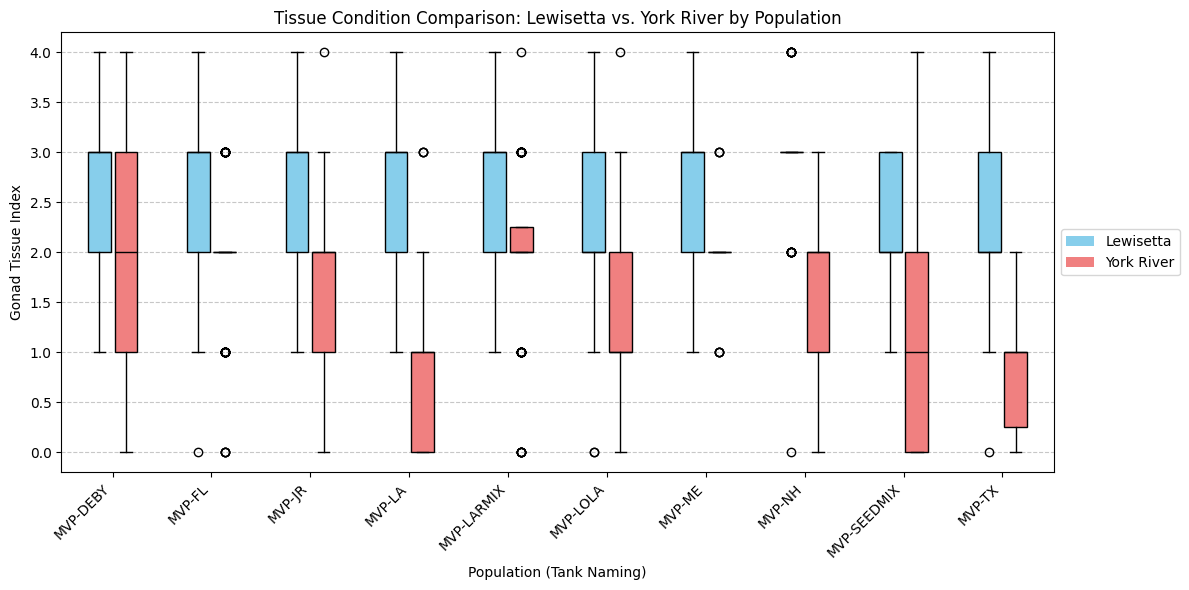

In [10]:
# Box plot for finalTissue_condition comparison

populations = df_clean['Tank_naming'].unique()
sites = df_clean['bag_site'].unique()

populations.sort()

# Using distinct colors for each site
site_colors = {'Lewisetta': 'skyblue', 'YorkRiver': 'lightcoral'}

fig, ax = plt.subplots(figsize=(12, 6))
box_width = 0.3
group_spacing = 0.7 # Space between each population group

tick_positions = []
tick_labels = []

for i, pop in enumerate(populations):
    pop_data = df_clean[df_clean['Tank_naming'] == pop]

    lewisetta_data = []
    york_river_data = []

    # Separating data for each site
    if 'Lewisetta' in sites:
        lewisetta_data = pop_data[pop_data['bag_site'] == 'Lewisetta']['finalTissue_condition'].tolist()
    if 'YorkRiver' in sites:
        york_river_data = pop_data[pop_data['bag_site'] == 'YorkRiver']['finalTissue_condition'].tolist()

    base_pos = i * (box_width * 2 + group_spacing)
    lewisetta_pos = base_pos
    york_river_pos = base_pos + box_width + 0.05 # Slightly offset for visual separation

    # Plotting boxplot for Lewisetta
    if lewisetta_data:
        bp_lewisetta = ax.boxplot(lewisetta_data, positions=[lewisetta_pos], widths=box_width, patch_artist=True)
        for box in bp_lewisetta['boxes']:
            box.set_facecolor(site_colors['Lewisetta'])
        for median in bp_lewisetta['medians']: # customize median line color
            median.set_color('black')

    # Plotting boxplot for YorkRiver
    if york_river_data:
        bp_york = ax.boxplot(york_river_data, positions=[york_river_pos], widths=box_width, patch_artist=True)
        for box in bp_york['boxes']:
            box.set_facecolor(site_colors['YorkRiver'])
        for median in bp_york['medians']: # customize median line color
            median.set_color('black')

    # Position for each x-tick label
    tick_positions.append((lewisetta_pos + york_river_pos) / 2)
    tick_labels.append(pop)

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha='right') # Rotate for readability
ax.set_xlabel('Population (Tank Naming)')
ax.set_ylabel('Gonad Tissue Index')
ax.set_title('Tissue Condition Comparison: Lewisetta vs. York River by Population')

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=site_colors['Lewisetta'], label='Lewisetta'),
    Patch(facecolor=site_colors['YorkRiver'], label='York River')
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


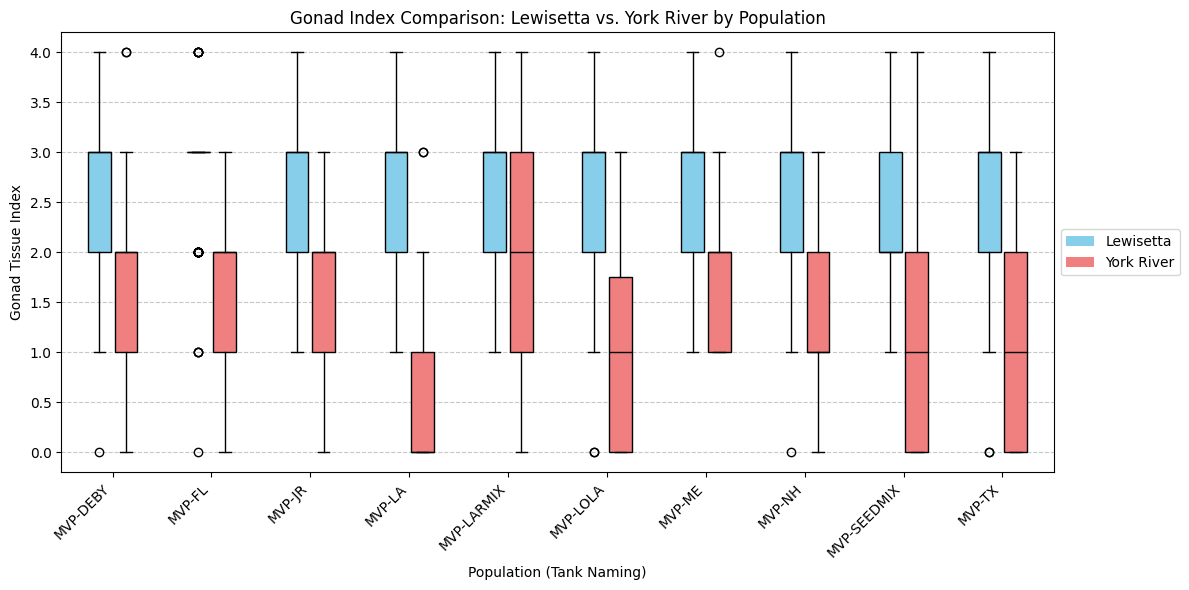

In [12]:
# Box plot for finalTissue_gonadIndex comparison

populations = df_clean['Tank_naming'].unique()
sites = df_clean['bag_site'].unique()

populations.sort()

# Using distinct colors for each site
site_colors = {'Lewisetta': 'skyblue', 'YorkRiver': 'lightcoral'}

fig, ax = plt.subplots(figsize=(12, 6))
box_width = 0.3
group_spacing = 0.7 # Space between each population group

tick_positions = []
tick_labels = []

for i, pop in enumerate(populations):
    pop_data = df_clean[df_clean['Tank_naming'] == pop]

    lewisetta_data = []
    york_river_data = []

    # Separating data for each site
    if 'Lewisetta' in sites:
        lewisetta_data = pop_data[pop_data['bag_site'] == 'Lewisetta']['finalTissue_gonadIndex'].tolist()
    if 'YorkRiver' in sites:
        york_river_data = pop_data[pop_data['bag_site'] == 'YorkRiver']['finalTissue_gonadIndex'].tolist()

    base_pos = i * (box_width * 2 + group_spacing)
    lewisetta_pos = base_pos
    york_river_pos = base_pos + box_width + 0.05 # Slightly offset for visual separation

    # Plotting boxplot for Lewisetta
    if lewisetta_data:
        bp_lewisetta = ax.boxplot(lewisetta_data, positions=[lewisetta_pos], widths=box_width, patch_artist=True)
        for box in bp_lewisetta['boxes']:
            box.set_facecolor(site_colors['Lewisetta'])
        for median in bp_lewisetta['medians']: # customize median line color
            median.set_color('black')

    # Plotting boxplot for YorkRiver
    if york_river_data:
        bp_york = ax.boxplot(york_river_data, positions=[york_river_pos], widths=box_width, patch_artist=True)
        for box in bp_york['boxes']:
            box.set_facecolor(site_colors['YorkRiver'])
        for median in bp_york['medians']: # customize median line color
            median.set_color('black')

    # Position for each x-tick label
    tick_positions.append((lewisetta_pos + york_river_pos) / 2)
    tick_labels.append(pop)

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha='right') # Rotate for readability
ax.set_xlabel('Population (Tank Naming)')
ax.set_ylabel('Gonad Tissue Index')
ax.set_title('Gonad Index Comparison: Lewisetta vs. York River by Population')

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=site_colors['Lewisetta'], label='Lewisetta'),
    Patch(facecolor=site_colors['YorkRiver'], label='York River')
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


We have a Workspace Extension, [Sheets to Colab](https://workspace.google.com/u/0/marketplace/app/sheets_to_colab/945625412720), which allows you to directly import data from Google Sheets into Colab from the Sheets UI. Follow the link to learn more.